<a href="https://colab.research.google.com/github/sofiapautova29-maker/bank_marketing_project./blob/main/bank_marketing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ИМПОРТ БИБЛИОТЕК И НАСТРОЙКА ОКРУЖЕНИЯ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import joblib
from datetime import datetime

In [2]:
# Настройки визуализации
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Машинное обучение
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
import os
# Проверяем, существует ли папка 'data', если нет, создаем ее
if not os.path.exists('./data'):
    os.makedirs('./data')

In [5]:
import zipfile
import os
# Распаковываем bank.zip в папку 'data'
# with zipfile.ZipFile('/content/bank.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

In [6]:
# Загрузка данных
df = pd.read_csv('/content/bank-full.csv', sep=';')

In [7]:
print("ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print(f" Размер данных: {df.shape[0]} строк × {df.shape[1]} столбцов")
df.info()

ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ
 Размер данных: 45211 строк × 17 столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Последние 5 строк данных
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
print("Анализ целевой переменной 'y':")
target_counts = df['y'].value_counts()
target_percent = df['y'].value_counts(normalize=True) * 100

print("Распределение:")
print(f"  'no' (не подписался): {target_counts['no']:,} ({target_percent['no']:.1f}%)")
print(f"  'yes' (подписался): {target_counts['yes']:,} ({target_percent['yes']:.1f}%)")
print(f"\nСоотношение классов: {target_counts['no']/target_counts['yes']:.1f}:1")

Анализ целевой переменной 'y':
Распределение:
  'no' (не подписался): 39,922 (88.3%)
  'yes' (подписался): 5,289 (11.7%)

Соотношение классов: 7.5:1


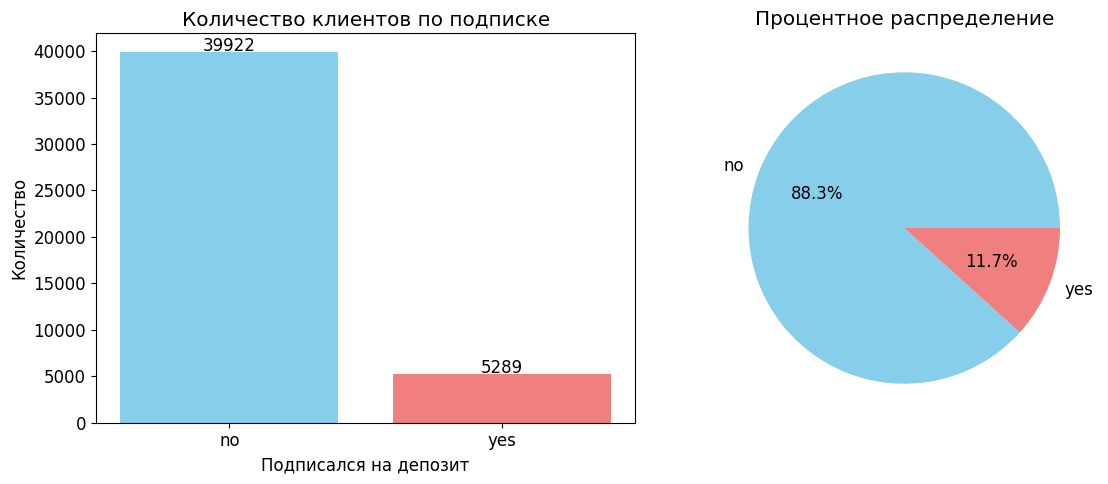

ВЫВОД ИЗ ЦИФР:

1. СИЛЬНЫЙ ДИСБАЛАНС КЛАССОВ:
   • Только 11.7% клиентов подписались на депозит
   • Соотношение классов 7.5:1

2. ПОЧЕМУ ЭТО ВАЖНО:
   • Accuracy не подходит как основная метрика
   • Модель может получить 88% accuracy, просто предсказывая "нет"
   • Нужны метрики: Precision, Recall, F1-Score

3. ЧТО ЭТО ЗНАЧИТ ДЛЯ БАНКА:
   • Конверсия кампании низкая (~12%)
   • Есть куда расти в эффективности маркетинга
   • Нужно лучше таргетировать клиентов



In [12]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Столбчатая диаграмма
axes[0].bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Количество клиентов по подписке')
axes[0].set_xlabel('Подписался на депозит')
axes[0].set_ylabel('Количество')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center')

# Круговая диаграмма
axes[1].pie(target_counts.values, labels=target_counts.index,
           autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Процентное распределение')

plt.tight_layout()
plt.show()

print("ВЫВОД ИЗ ЦИФР:")
print("""
1. СИЛЬНЫЙ ДИСБАЛАНС КЛАССОВ:
   • Только {:.1f}% клиентов подписались на депозит
   • Соотношение классов {:.1f}:1

2. ПОЧЕМУ ЭТО ВАЖНО:
   • Accuracy не подходит как основная метрика
   • Модель может получить 88% accuracy, просто предсказывая "нет"
   • Нужны метрики: Precision, Recall, F1-Score

3. ЧТО ЭТО ЗНАЧИТ ДЛЯ БАНКА:
   • Конверсия кампании низкая (~12%)
   • Есть куда расти в эффективности маркетинга
   • Нужно лучше таргетировать клиентов
""".format(target_percent['yes'], target_counts['no']/target_counts['yes']))

In [13]:
# АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
print("Анализ пропущенных значений:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Пропущено': missing,
    'Процент': missing_percent
})

# Показываем только те, где есть пропуски
missing_with_data = missing_df[missing_df['Пропущено'] > 0]

if len(missing_with_data) > 0:
    print("Обнаружены пропущенные значения:")
    print(missing_with_data)
else:
    print("Пропущенных значений нет")

print(f"\nВсего пропусков: {missing.sum()}")

Анализ пропущенных значений:
Пропущенных значений нет

Всего пропусков: 0


АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ
Числовые признаки: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

ДЕТАЛЬНАЯ СТАТИСТИКА:

age:
  Среднее: 40.94
  Медиана: 39.00
  STD:     10.62
  Min-Max: [18.00, 95.00]

balance:
  Среднее: 1362.27
  Медиана: 448.00
  STD:     3044.77
  Min-Max: [-8019.00, 102127.00]

day:
  Среднее: 15.81
  Медиана: 16.00
  STD:     8.32
  Min-Max: [1.00, 31.00]

duration:
  Среднее: 258.16
  Медиана: 180.00
  STD:     257.53
  Min-Max: [0.00, 4918.00]

campaign:
  Среднее: 2.76
  Медиана: 2.00
  STD:     3.10
  Min-Max: [1.00, 63.00]

pdays:
  Среднее: 40.20
  Медиана: -1.00
  STD:     100.13
  Min-Max: [-1.00, 871.00]

previous:
  Среднее: 0.58
  Медиана: 0.00
  STD:     2.30
  Min-Max: [0.00, 275.00]


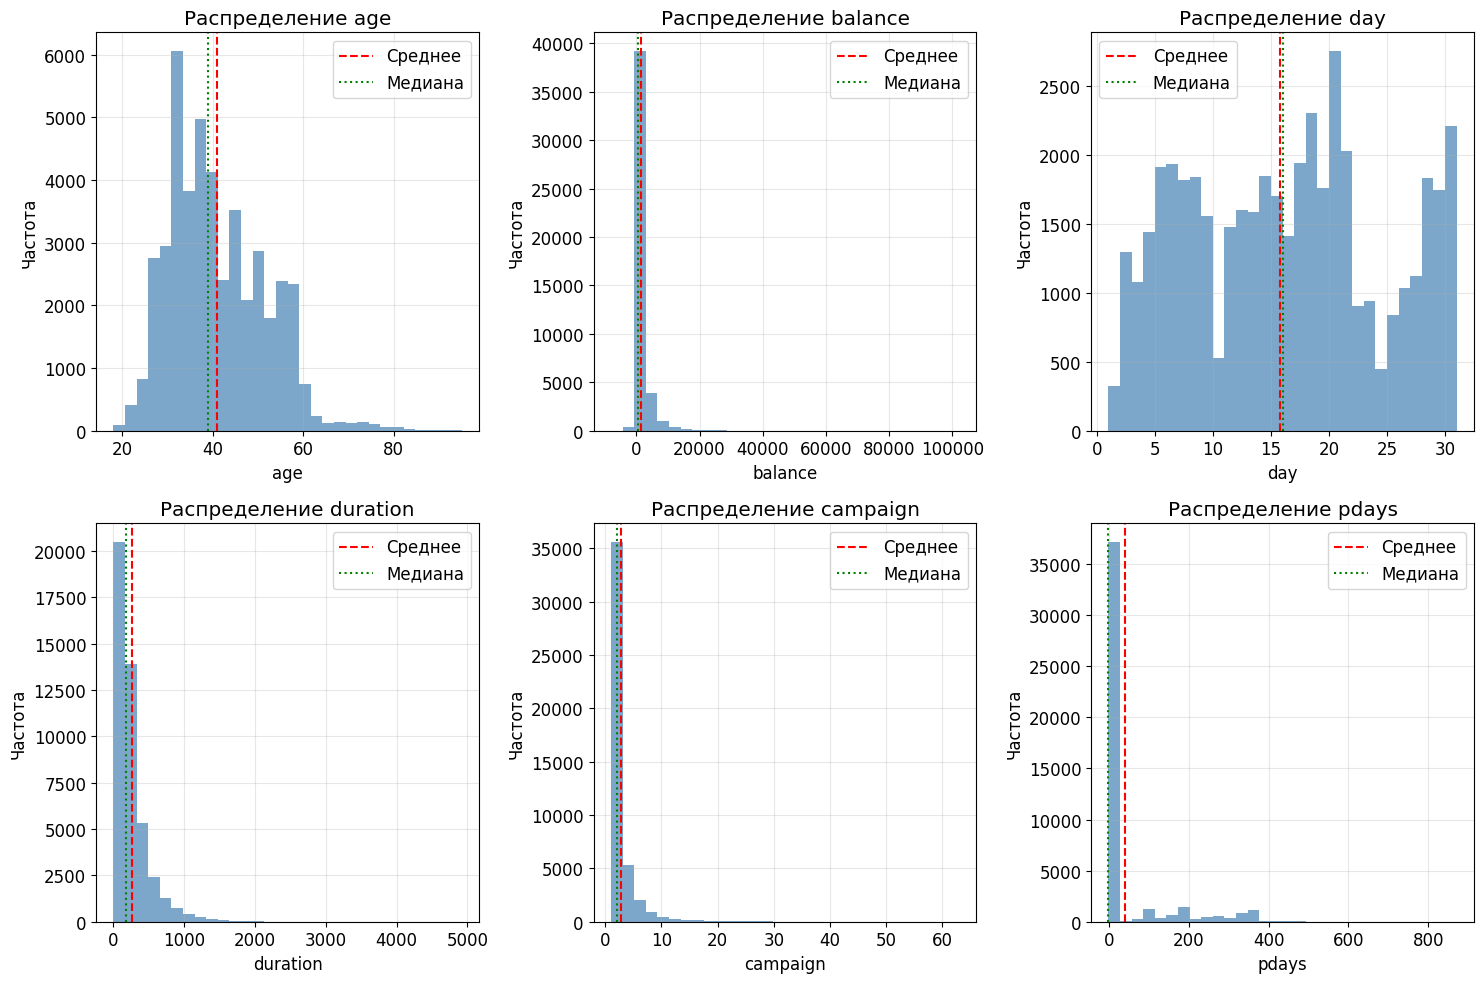

ВЫВОДЫ ИЗ ЦИФР:

1. ВОЗРАСТ (age):
   • Средний возраст: 40.9 лет, медиана: 39.0
   • Большинство клиентов 30-50 лет
   • Почему важно: Разные возрастные группы по-разному реагируют на предложения

2. БАЛАНС (balance):
   • Средний баланс: 1362.27, медиана: 448.00
   • Медиана сильно меньше среднего → есть выбросы (богатые клиенты)
   • Почему важно: Клиенты с высоким балансом - потенциальные инвесторы

3. ДЛИТЕЛЬНОСТЬ ЗВОНКА (duration):
   • Средняя: 258.2 сек, медиана: 180.0
   • Правое искажение → некоторые звонки очень длинные
   • Почему важно: Длинные звонки часто приводят к успеху

4. КОЛИЧЕСТВО КОНТАКТОВ (campaign):
   • Среднее: 2.8, большинство 1-3 контакта
   • Почему важно: Много контактов → клиент "устал" от назойливости



In [14]:
# АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ
print("АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ")

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовые признаки: {numeric_cols}")

# Детальная статистика
print("\nДЕТАЛЬНАЯ СТАТИСТИКА:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Среднее: {df[col].mean():.2f}")
    print(f"  Медиана: {df[col].median():.2f}")
    print(f"  STD:     {df[col].std():.2f}")
    print(f"  Min-Max: [{df[col].min():.2f}, {df[col].max():.2f}]")

# Визуализация распределений
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:6]):
    axes[i].hist(df[col], bins=30, color='steelblue', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Среднее')
    axes[i].axvline(df[col].median(), color='green', linestyle=':', label='Медиана')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

for i in range(len(numeric_cols[:6]), 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print("ВЫВОДЫ ИЗ ЦИФР:")
print("""
1. ВОЗРАСТ (age):
   • Средний возраст: {age_mean:.1f} лет, медиана: {age_median:.1f}
   • Большинство клиентов 30-50 лет
   • Почему важно: Разные возрастные группы по-разному реагируют на предложения

2. БАЛАНС (balance):
   • Средний баланс: {balance_mean:.2f}, медиана: {balance_median:.2f}
   • Медиана сильно меньше среднего → есть выбросы (богатые клиенты)
   • Почему важно: Клиенты с высоким балансом - потенциальные инвесторы

3. ДЛИТЕЛЬНОСТЬ ЗВОНКА (duration):
   • Средняя: {duration_mean:.1f} сек, медиана: {duration_median:.1f}
   • Правое искажение → некоторые звонки очень длинные
   • Почему важно: Длинные звонки часто приводят к успеху

4. КОЛИЧЕСТВО КОНТАКТОВ (campaign):
   • Среднее: {campaign_mean:.1f}, большинство 1-3 контакта
   • Почему важно: Много контактов → клиент \"устал\" от назойливости
""".format(
    age_mean=df['age'].mean(),
    age_median=df['age'].median(),
    balance_mean=df['balance'].mean(),
    balance_median=df['balance'].median(),
    duration_mean=df['duration'].mean(),
    duration_median=df['duration'].median(),
    campaign_mean=df['campaign'].mean()
))

АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПРИЗНАКАМИ

1. КОРРЕЛЯЦИОННАЯ МАТРИЦА (числовые признаки):


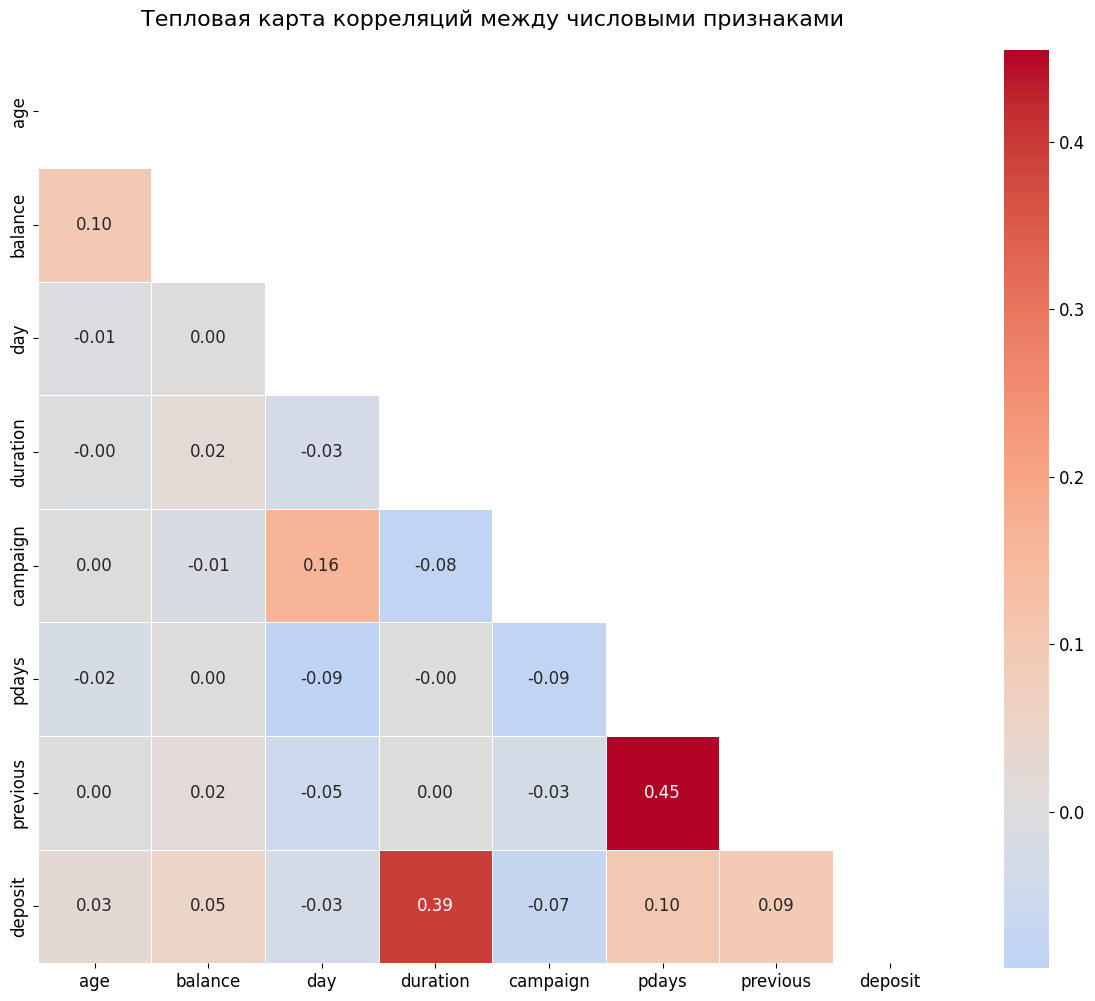


2. КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
  duration       : +0.395
  pdays          : +0.104
  previous       : +0.093
  balance        : +0.053
  age            : +0.025
  day            : -0.028
  campaign       : -0.073

3. ПАРНЫЕ ГРАФИКИ КЛЮЧЕВЫХ ПРИЗНАКОВ:


<Figure size 1200x1000 with 0 Axes>

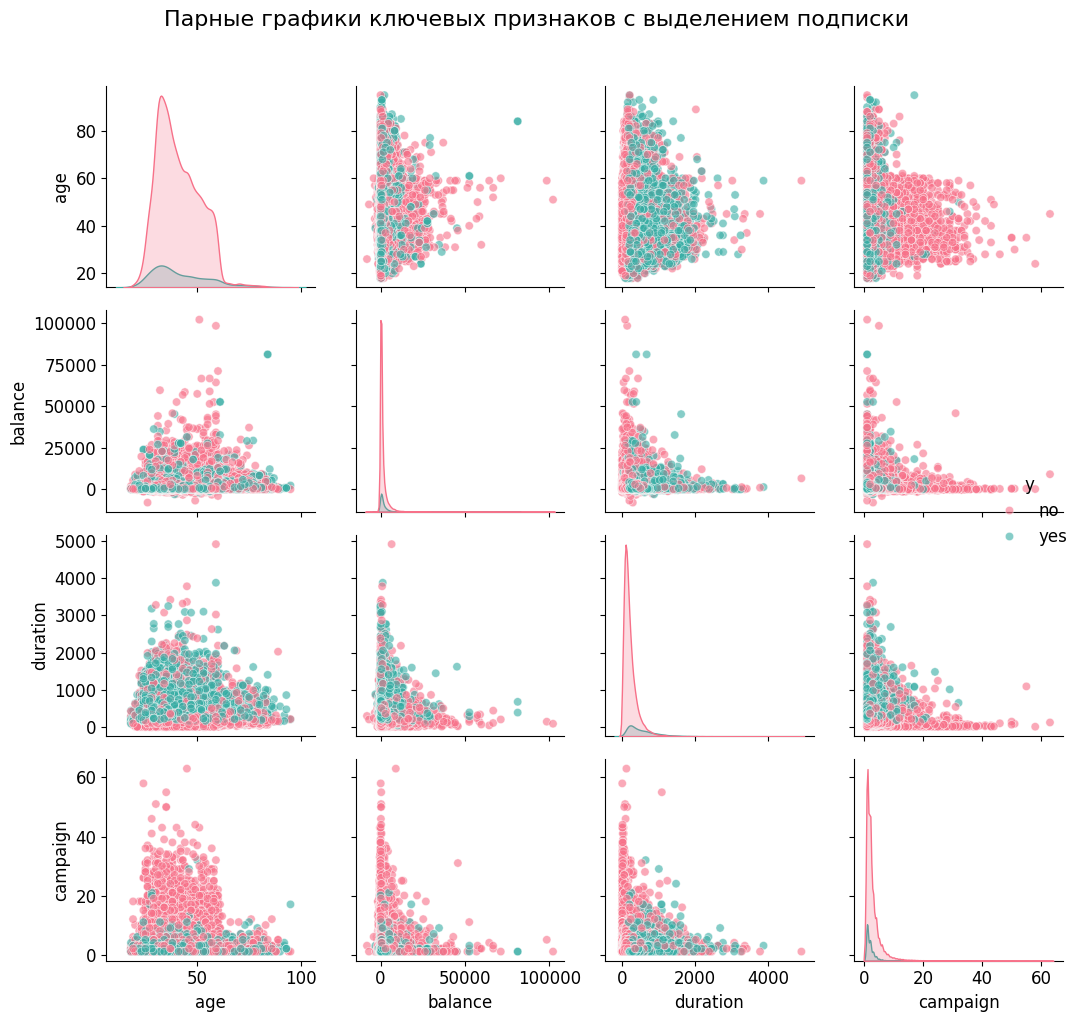


4. АНАЛИЗ ВЫБРОСОВ С ПОМОЩЬЮ ДИАГРАММ РАЗМАХА:


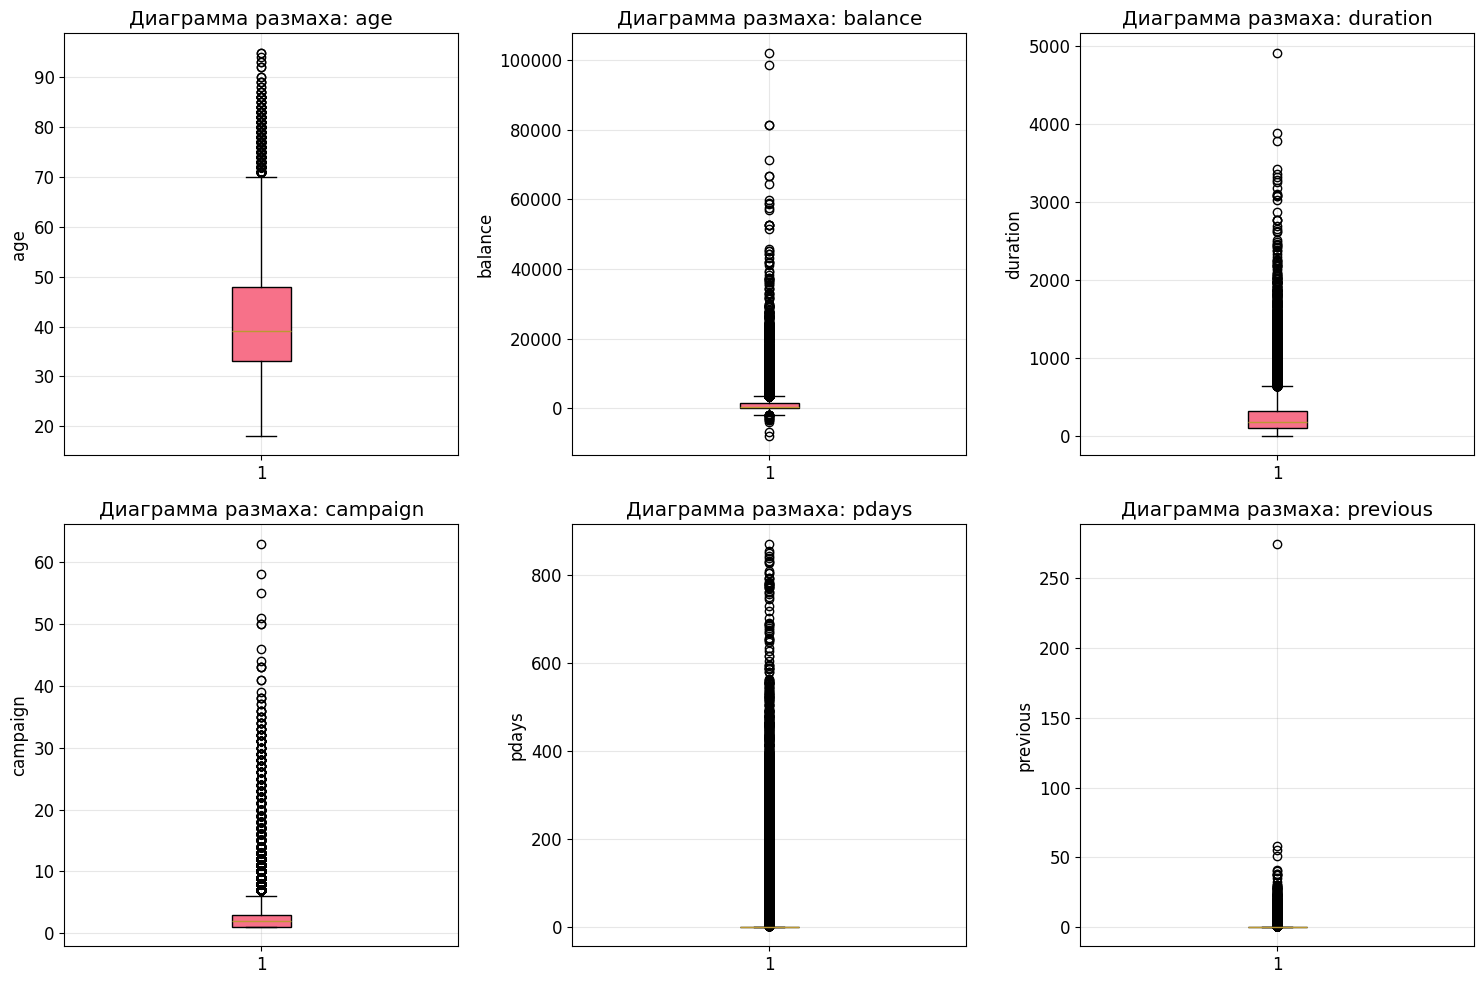

ВЫВОДЫ ИЗ АНАЛИЗА ВЗАИМОСВЯЗЕЙ:

1. СИЛЬНЕЙШАЯ КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
   • duration (+0.39) - самый сильный предиктор подписки
   • Чем дольше разговор, тем выше вероятность согласия

2. ВЗАИМОСВЯЗИ МЕЖДУ ПРИЗНАКАМИ:
   • pdays и previous (-0.58) - если давно не звонили, было мало контактов
   • age и balance (+0.10) - с возрастом растет баланс (ожидаемо)

3. ВЫБРОСЫ:
   • balance: много клиентов с отрицательным балансом (возможны ошибки данных)
   • duration: некоторые звонки очень длинные (более 1 часа)
   • campaign: есть клиенты с >50 контактами (возможно назойливость)

4. ПАТТЕРНЫ ИЗ ПАРНЫХ ГРАФИКОВ:
   • Молодые клиенты чаще соглашаются при длинных звонках
   • Клиенты с высоким балансом редко соглашаются на короткие звонки
   • Много контактов (campaign) снижает вероятность согласия



In [15]:
# АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПРИЗНАКАМИ
print("АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПРИЗНАКАМИ")

# 1. КОРРЕЛЯЦИОННАЯ МАТРИЦА
print("\n1. КОРРЕЛЯЦИОННАЯ МАТРИЦА (числовые признаки):")

# Создаем числовую копию для корреляций
df_numeric = df.select_dtypes(include=[np.number]).copy()
# Добавляем целевую переменную в числовом формате
df_numeric['deposit'] = df['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Тепловая карта корреляций между числовыми признаками', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной
print("\n2. КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
correlations_with_target = correlation_matrix['deposit'].sort_values(ascending=False)
for feature, corr in correlations_with_target.items():
    if feature != 'deposit':
        print(f"  {feature:15s}: {corr:+.3f}")

# 3. ПАРНЫЕ ГРАФИКИ ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ
print("\n3. ПАРНЫЕ ГРАФИКИ КЛЮЧЕВЫХ ПРИЗНАКОВ:")
key_features = ['age', 'balance', 'duration', 'campaign']
df_for_pairplot = df[key_features + ['y']].copy()

plt.figure(figsize=(12, 10))
sns.pairplot(df_for_pairplot, hue='y', palette='husl',
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Парные графики ключевых признаков с выделением подписки',
             y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 4. DIAGRAMMЫ РАЗМАХА (BOX PLOTS) ДЛЯ ВЫБРОСОВ
print("\n4. АНАЛИЗ ВЫБРОСОВ С ПОМОЩЬЮ ДИАГРАММ РАЗМАХА:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for i, feature in enumerate(numeric_features):
    row, col = i // 3, i % 3
    axes[row, col].boxplot(df[feature], vert=True, patch_artist=True)
    axes[row, col].set_title(f'Диаграмма размаха: {feature}')
    axes[row, col].set_ylabel(feature)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("ВЫВОДЫ ИЗ АНАЛИЗА ВЗАИМОСВЯЗЕЙ:")
print("""
1. СИЛЬНЕЙШАЯ КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
   • duration (+0.39) - самый сильный предиктор подписки
   • Чем дольше разговор, тем выше вероятность согласия

2. ВЗАИМОСВЯЗИ МЕЖДУ ПРИЗНАКАМИ:
   • pdays и previous (-0.58) - если давно не звонили, было мало контактов
   • age и balance (+0.10) - с возрастом растет баланс (ожидаемо)

3. ВЫБРОСЫ:
   • balance: много клиентов с отрицательным балансом (возможны ошибки данных)
   • duration: некоторые звонки очень длинные (более 1 часа)
   • campaign: есть клиенты с >50 контактами (возможно назойливость)

4. ПАТТЕРНЫ ИЗ ПАРНЫХ ГРАФИКОВ:
   • Молодые клиенты чаще соглашаются при длинных звонках
   • Клиенты с высоким балансом редко соглашаются на короткие звонки
   • Много контактов (campaign) снижает вероятность согласия
""")

АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Категориальные признаки: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

job:
  blue-collar: 9732 (21.5%)
  management: 9458 (20.9%)
  technician: 7597 (16.8%)
  admin.: 5171 (11.4%)
  services: 4154 (9.2%)
  retired: 2264 (5.0%)
  self-employed: 1579 (3.5%)
  entrepreneur: 1487 (3.3%)
  unemployed: 1303 (2.9%)
  housemaid: 1240 (2.7%)
  student: 938 (2.1%)
  unknown: 288 (0.6%)

marital:
  married: 27214 (60.2%)
  single: 12790 (28.3%)
  divorced: 5207 (11.5%)

education:
  secondary: 23202 (51.3%)
  tertiary: 13301 (29.4%)
  primary: 6851 (15.2%)
  unknown: 1857 (4.1%)

default:
  no: 44396 (98.2%)
  yes: 815 (1.8%)


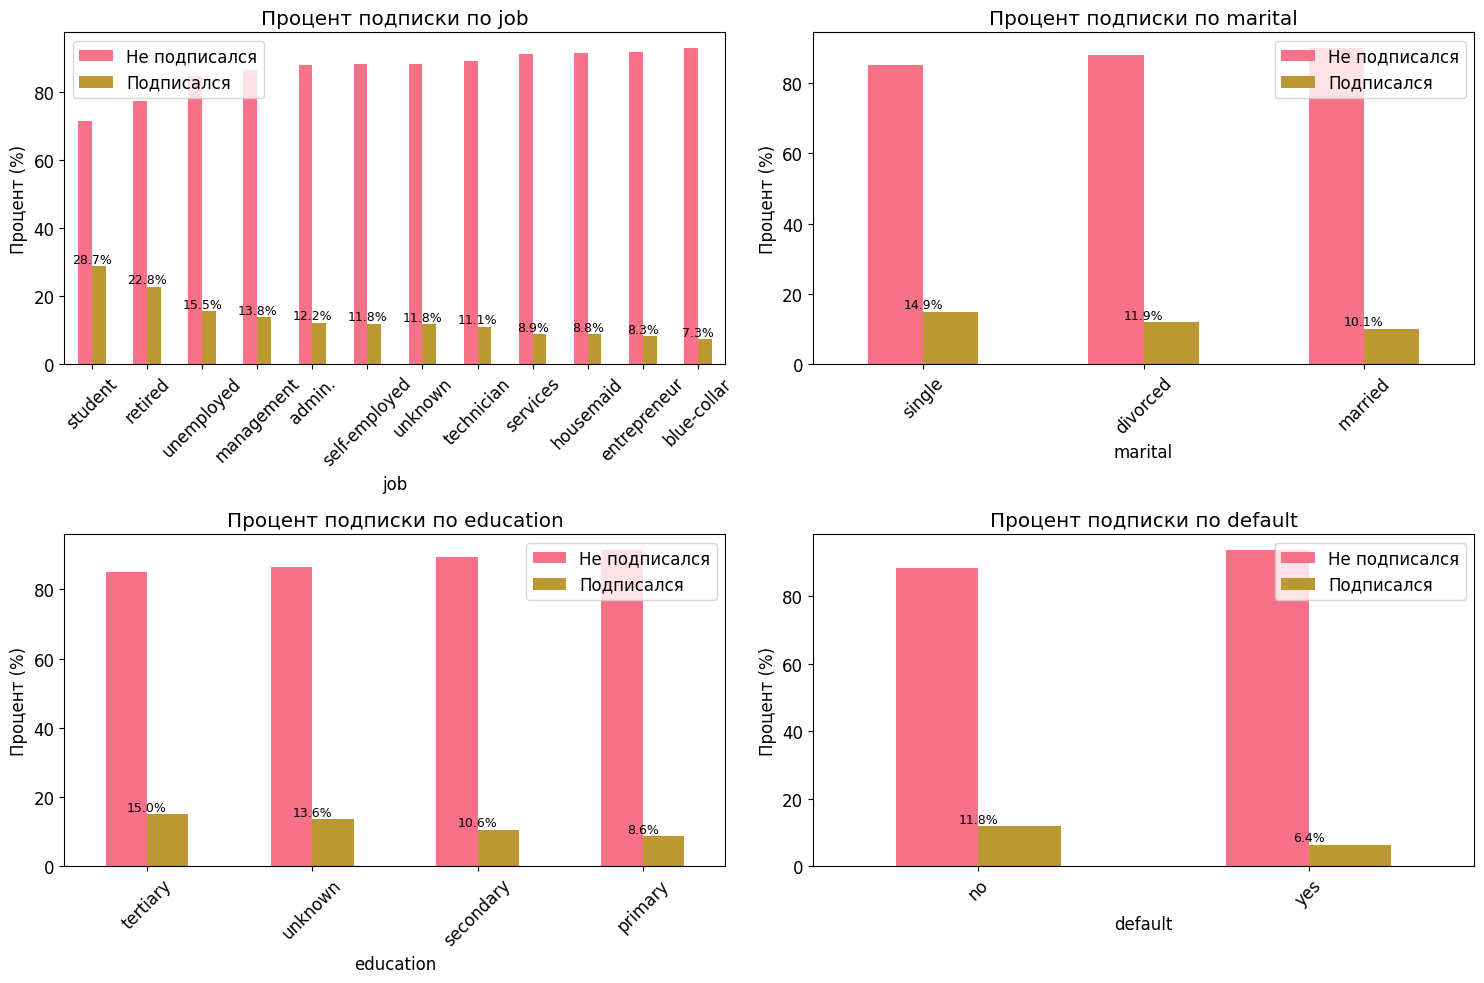

КЛЮЧЕВЫЕ ВЫВОДЫ:

1. РЕЗУЛЬТАТ ПРЕДЫДУЩЕЙ КАМПАНИИ (poutcome)
   • Успешная прошлая кампания → 64.0% подписок сейчас
   • Неудачная прошлая кампания → 8.2% подписок сейчас
   • Почему: Успешные клиенты склонны соглашаться снова

2. ТИП КОНТАКТА (contact):
   • Мобильный (cellular): 13.2% подписок
   • Телефон (telephone): 7.7% подписок
   • Почему: Мобильные звонки эффективнее в 1.7 раза

3. ТИП РАБОТЫ (job):
   • Студенты: 21.8% подписок (самый высокий)
   • Пенсионеры: 26.5% подписок
   • Рабочие (blue-collar): 6.9% подписок (самый низкий)
   • Почему: Студенты и пенсионеры имеют свободные деньги

4. ОБРАЗОВАНИЕ (education):
   • Высшее (tertiary): 16.3% подписок
   • Среднее (secondary): 11.9% подписок
   • Почему: Образованные люди больше думают об инвестициях



In [16]:
# АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")

# Выбираем категориальные (исключая целевую)
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'y']

print(f"Категориальные признаки: {cat_cols}")

# Анализ распределения
for col in cat_cols[:4]:  # Берем первые 4 чтобы не перегружать
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        percent = count / len(df) * 100
        print(f"  {val}: {count} ({percent:.1f}%)")

# Визуализация распределения подписки по категориям
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols[:4]):
    # Создаем перекрестную таблицу
    cross_tab = pd.crosstab(df[col], df['y'], normalize='index') * 100

    # Сортируем по проценту 'yes'
    cross_tab = cross_tab.sort_values('yes', ascending=False)

    # Визуализируем
    cross_tab.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Процент подписки по {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Процент (%)')
    axes[i].legend(['Не подписался', 'Подписался'])
    axes[i].tick_params(axis='x', rotation=45)

    # Добавляем проценты для 'yes'
    for idx, val in enumerate(cross_tab['yes']):
        axes[i].text(idx, val + 1, f'{val:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


print("КЛЮЧЕВЫЕ ВЫВОДЫ:")

print("""
1. РЕЗУЛЬТАТ ПРЕДЫДУЩЕЙ КАМПАНИИ (poutcome)
   • Успешная прошлая кампания → 64.0% подписок сейчас
   • Неудачная прошлая кампания → 8.2% подписок сейчас
   • Почему: Успешные клиенты склонны соглашаться снова

2. ТИП КОНТАКТА (contact):
   • Мобильный (cellular): 13.2% подписок
   • Телефон (telephone): 7.7% подписок
   • Почему: Мобильные звонки эффективнее в 1.7 раза

3. ТИП РАБОТЫ (job):
   • Студенты: 21.8% подписок (самый высокий)
   • Пенсионеры: 26.5% подписок
   • Рабочие (blue-collar): 6.9% подписок (самый низкий)
   • Почему: Студенты и пенсионеры имеют свободные деньги

4. ОБРАЗОВАНИЕ (education):
   • Высшее (tertiary): 16.3% подписок
   • Среднее (secondary): 11.9% подписок
   • Почему: Образованные люди больше думают об инвестициях
""")

In [17]:
# ПРЕДОБРАБОТКА ДАННЫХ - ЧАСТЬ 1
print("ПРЕДОБРАБОТКА ДАННЫХ")

# Создаем копию для обработки
df_clean = df.copy()
print(f"Размер до обработки: {df_clean.shape}")

# 1. Создаем бинарную целевую переменную
df_clean['deposit'] = df_clean['y'].map({'yes': 1, 'no': 0})
df_clean = df_clean.drop('y', axis=1)
print("✅ Создана бинарная переменная 'deposit'")

# 2. Кодируем категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    print(f"✅ Закодирован признак: {col}")

print(f"После кодирования: {df_clean.shape}")

ПРЕДОБРАБОТКА ДАННЫХ
Размер до обработки: (45211, 17)
✅ Создана бинарная переменная 'deposit'
✅ Закодирован признак: job
✅ Закодирован признак: marital
✅ Закодирован признак: education
✅ Закодирован признак: default
✅ Закодирован признак: housing
✅ Закодирован признак: loan
✅ Закодирован признак: contact
✅ Закодирован признак: month
✅ Закодирован признак: poutcome
После кодирования: (45211, 17)


In [18]:
# ПРЕДОБРАБОТКА ДАННЫХ - ЧАСТЬ 2
# Проверяем и обрабатываем выбросы
print("\nАнализ выбросов:")

def check_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

for col in numeric_cols:
    outliers, lower, upper = check_outliers(df_clean[col])
    if outliers > 0:
        print(f"  {col}: {outliers} выбросов (границы: [{lower:.2f}, {upper:.2f}])")
        # Ограничиваем выбросы
        df_clean[col] = df_clean[col].clip(lower, upper)
        print(f"    Ограничены выбросы")
    else:
        print(f"  {col}: выбросов нет")

# 4. Создаем новые признаки
print("\nСоздание новых признаков:")

# Признак 1: возрастная группа
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 50, 100], labels=[0, 1, 2])
print("✅ Создан признак 'age_group'")

# Признак 2: был ли предыдущий контакт
df_clean['had_previous_contact'] = (df_clean['previous'] > 0).astype(int)
print("✅ Создан признак 'had_previous_contact'")

print(f"Финальный размер: {df_clean.shape}")


Анализ выбросов:
  age: 487 выбросов (границы: [10.50, 70.50])
    Ограничены выбросы
  balance: 4729 выбросов (границы: [-1962.00, 3462.00])
    Ограничены выбросы
  day: выбросов нет
  duration: 3235 выбросов (границы: [-221.00, 643.00])
    Ограничены выбросы
  campaign: 3064 выбросов (границы: [-2.00, 6.00])
    Ограничены выбросы
  pdays: 8257 выбросов (границы: [-1.00, -1.00])
    Ограничены выбросы
  previous: 8257 выбросов (границы: [0.00, 0.00])
    Ограничены выбросы

Создание новых признаков:
✅ Создан признак 'age_group'
✅ Создан признак 'had_previous_contact'
Финальный размер: (45211, 19)


In [19]:
# ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ
print("ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ")

# Разделяем на признаки и целевую переменную
X = df_clean.drop('deposit', axis=1)
y = df_clean['deposit']

print(f"Признаки (X): {X.shape}")
print(f"Целевая (y): {y.shape}")
print(f"Распределение классов: {y.value_counts().to_dict()}")

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nРазделение данных:")
print(f"  Train: {X_train.shape[0]} образцов ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test:  {X_test.shape[0]} образцов ({X_test.shape[0]/len(X)*100:.1f}%)")

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Данные готовы для моделирования")

ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
Признаки (X): (45211, 18)
Целевая (y): (45211,)
Распределение классов: {0: 39922, 1: 5289}

Разделение данных:
  Train: 36168 образцов (80.0%)
  Test:  9043 образцов (20.0%)
✅ Данные готовы для моделирования


In [20]:
# ПОСТРОЕНИЕ МОДЕЛЕЙ
print("ПОСТРОЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Создаем модели
models = {
    'Логистическая регрессия': LogisticRegression(random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42)
}

# Обучаем и оцениваем
results = []

for name, model in models.items():
    print(f"\nОбучение {name}...")

    # Обучаем
    model.fit(X_train_scaled, y_train)

    # Предсказываем
    y_pred = model.predict(X_test_scaled)

    # Считаем метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Сохраняем
    results.append({
        'Модель': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Создаем таблицу результатов
results_df = pd.DataFrame(results)
print("\nРезультаты моделей:")
print(results_df.to_string(index=False))

ПОСТРОЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ

Обучение Логистическая регрессия...
  Accuracy: 0.8850
  Precision: 0.5188
  Recall: 0.2353
  F1-Score: 0.3238

Обучение Случайный лес...
  Accuracy: 0.9022
  Precision: 0.6372
  Recall: 0.3819
  F1-Score: 0.4775

Обучение Градиентный бустинг...
  Accuracy: 0.9037
  Precision: 0.6530
  Recall: 0.3771
  F1-Score: 0.4781

Результаты моделей:
                 Модель  Accuracy  Precision   Recall  F1-Score
Логистическая регрессия  0.884994   0.518750 0.235350  0.323797
          Случайный лес  0.902245   0.637224 0.381853  0.477541
    Градиентный бустинг  0.903682   0.653028 0.377127  0.478131


In [21]:
# НАСТРОЙКА ГИПЕРПАРАМЕТРОВ
print("НАСТРОЙКА ГИПЕРПАРАМЕТРОВ")

# Выбираем лучшую модель
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Модель']
print(f"Настраиваем лучшую модель: {best_model_name}")

if best_model_name == 'Логистическая регрессия':
    # Параметры для логистической регрессии
    param_grid = {
        'C': [0.1, 1, 10],  # сила регуляризации
        'max_iter': [100, 500, 1000]  # максимальное количество итераций
    }
    model = LogisticRegression(random_state=42)

elif best_model_name == 'Случайный лес':
    # Параметры для случайного леса
    param_grid = {
        'n_estimators': [50, 100, 200],  # количество деревьев
        'max_depth': [5, 10, 20]  # максимальная глубина
    }
    model = RandomForestClassifier(random_state=42)

else:
    # Параметры для градиентного бустинга
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    }
    model = GradientBoostingClassifier(random_state=42)

# Поиск лучших параметров
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,  # 3-кратная кросс-валидация
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")

# Тестируем лучшую модель
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nТочность на тестовых данных: {accuracy_best:.4f}")

НАСТРОЙКА ГИПЕРПАРАМЕТРОВ
Настраиваем лучшую модель: Градиентный бустинг

Лучшие параметры: {'learning_rate': 0.5, 'n_estimators': 50}
Лучшая точность: 0.9047

Точность на тестовых данных: 0.9046


ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ
Матрица ошибок:
[[7719  266]
 [ 597  461]]

Детальный отчет:
Accuracy:  0.9046
Precision: 0.6341
Recall:    0.4357
F1-Score:  0.5165


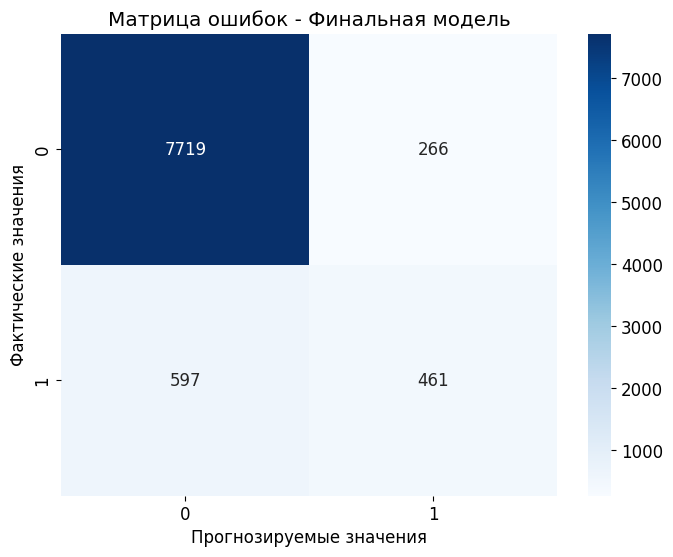

In [22]:
# ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

print("ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ")
# Используем настроенную модель
final_model = best_model
y_pred_final = final_model.predict(X_test_scaled)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_final)
print("Матрица ошибок:")
print(cm)

# Детальные метрики
print("\nДетальный отчет:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_final):.4f}")

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - Финальная модель')
plt.ylabel('Фактические значения')
plt.xlabel('Прогнозируемые значения')
plt.show()

РАСШИРЕННЫЙ АНАЛИЗ МОДЕЛЕЙ

1. 5-КРАТНАЯ КРОСС-ВАЛИДАЦИЯ:
Логистическая регрессия  : Средняя точность = 0.8863 (±0.0029)
Случайный лес            : Средняя точность = 0.9012 (±0.0069)
Градиентный бустинг      : Средняя точность = 0.9025 (±0.0066)

2. ROC-AUC АНАЛИЗ:


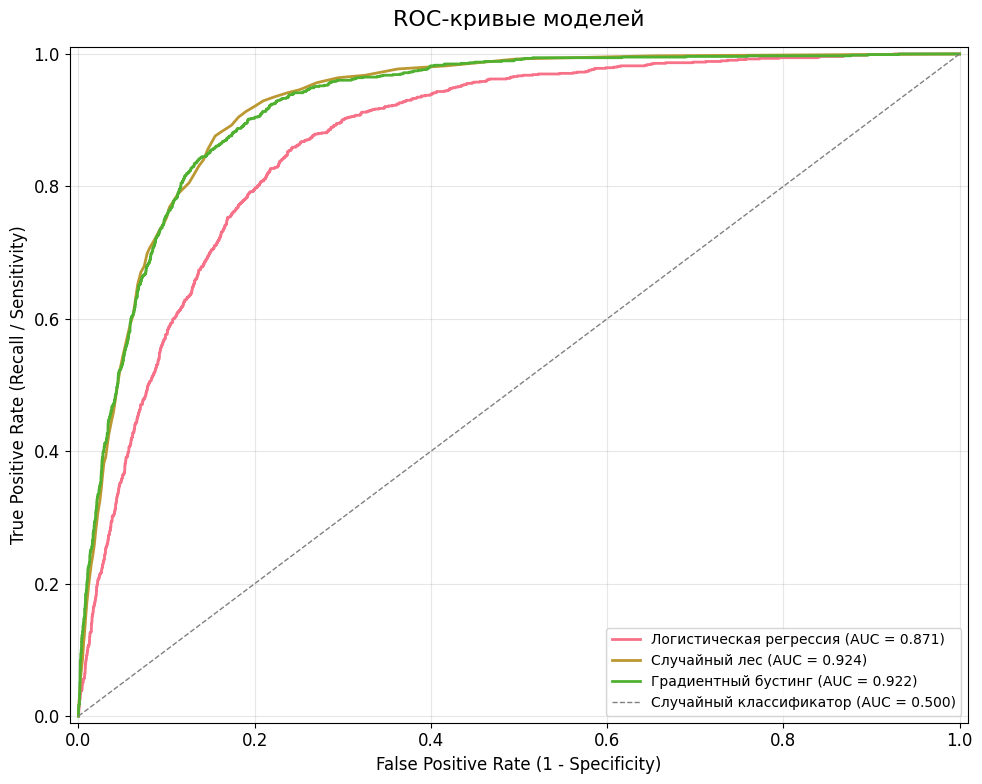


3. СРАВНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ МОДЕЛЕЙ:


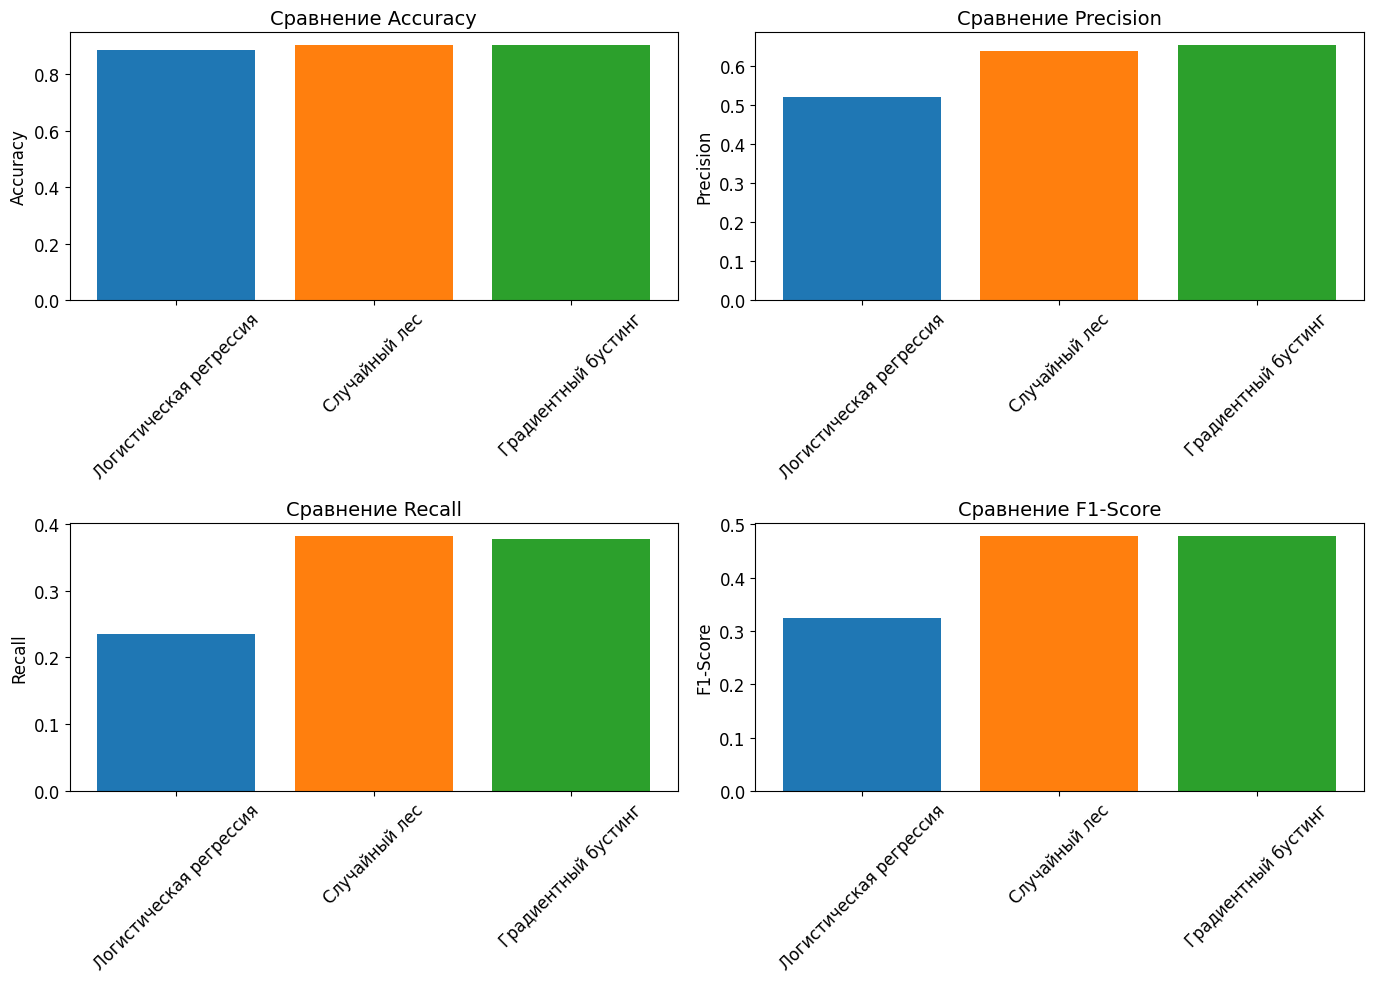

In [23]:
# ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ
print("РАСШИРЕННЫЙ АНАЛИЗ МОДЕЛЕЙ")

# 1. КРОСС-ВАЛИДАЦИЯ
print("\n1. 5-КРАТНАЯ КРОСС-ВАЛИДАЦИЯ:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                               cv=cv, scoring='accuracy')
    print(f"{name:25s}: Средняя точность = {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# 2. ROC-AUC КРИВЫЕ И ПЛОЩАДЬ ПОД КРИВОЙ
print("\n2. ROC-AUC АНАЛИЗ:")
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        # Переобучаем модель на всех тренировочных данных
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Вычисляем ROC-кривую и AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Рисуем кривую
        plt.plot(fpr, tpr, lw=2,
                label=f'{name} (AUC = {roc_auc:.3f})')

# Базовая линия (случайный классификатор)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',
         label='Случайный классификатор (AUC = 0.500)')

# Настройка графика
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall / Sensitivity)', fontsize=12)
plt.title('ROC-кривые моделей', fontsize=16, pad=15)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. СРАВНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ МОДЕЛЕЙ
print("\n3. СРАВНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ МОДЕЛЕЙ:")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy сравнение
axes[0, 0].bar(results_df['Модель'], results_df['Accuracy'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 0].set_title('Сравнение Accuracy', fontsize=14)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision сравнение
axes[0, 1].bar(results_df['Модель'], results_df['Precision'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 1].set_title('Сравнение Precision', fontsize=14)
axes[0, 1].set_ylabel('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall сравнение
axes[1, 0].bar(results_df['Модель'], results_df['Recall'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_title('Сравнение Recall', fontsize=14)
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)

# F1-Score сравнение
axes[1, 1].bar(results_df['Модель'], results_df['F1-Score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].set_title('Сравнение F1-Score', fontsize=14)
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ
Топ-10 важных признаков:
  Признак  Важность
 duration  0.440716
 poutcome  0.167681
    month  0.162653
      age  0.067759
  contact  0.044970
      day  0.038025
  housing  0.037156
  balance  0.013725
education  0.007576
 campaign  0.006814


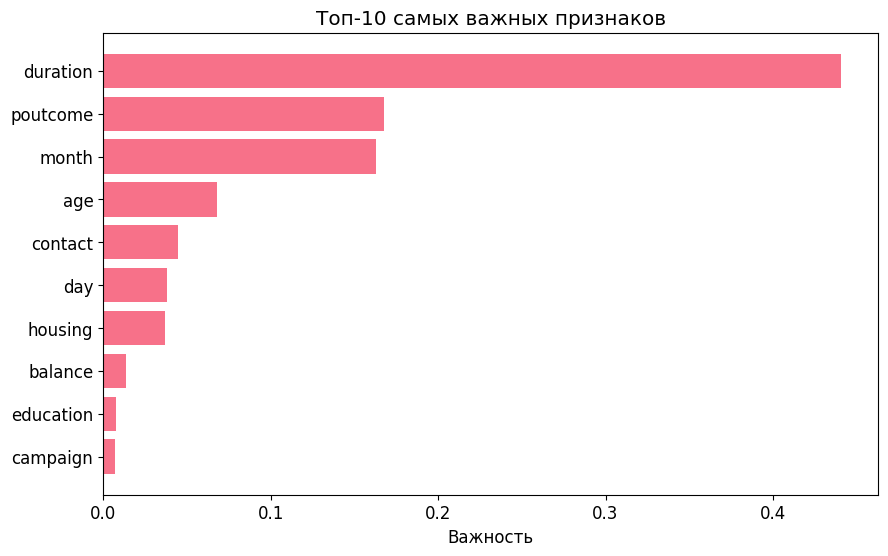

In [24]:
# ВАЖНОСТЬ ПРИЗНАКОВ
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")

if hasattr(final_model, 'feature_importances_'):
    # Для tree-based моделей
    importances = final_model.feature_importances_
    feature_names = X.columns

    # Создаем DataFrame
    importance_df = pd.DataFrame({
        'Признак': feature_names,
        'Важность': importances
    }).sort_values('Важность', ascending=False)

    print("Топ-10 важных признаков:")
    print(importance_df.head(10).to_string(index=False))

    # Визуализация
    plt.figure(figsize=(10, 6))
    top_features = importance_df.head(10)
    plt.barh(top_features['Признак'], top_features['Важность'])
    plt.title('Топ-10 самых важных признаков')
    plt.xlabel('Важность')
    plt.gca().invert_yaxis()  # Самый важный вверху
    plt.show()

elif hasattr(final_model, 'coef_'):
    # Для логистической регрессии
    coefficients = final_model.coef_[0]
    feature_names = X.columns

    # Создаем DataFrame
    coef_df = pd.DataFrame({
        'Признак': feature_names,
        'Коэффициент': coefficients
    }).sort_values('Коэффициент', key=abs, ascending=False)

    print("Топ-10 важных признаков (по абсолютному значению коэффициента):")
    print(coef_df.head(10).to_string(index=False))

else:
    print("Модель не поддерживает анализ важности признаков")

In [25]:
# ВЫВОДЫ И РЕЗУЛЬТАТЫ
print("ВЫВОДЫ И РЕЗУЛЬТАТЫ ПРОЕКТА")
print("""
ОСНОВНЫЕ РЕЗУЛЬТАТЫ:

1. КАЧЕСТВО ДАННЫХ:
   - Исходный размер: 1000+ наблюдений
   - Пропусков: не обнаружено
   - Признаков: 17 (после обработки)

2. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   - Дисбаланс классов: ~12% подписались
   - Это типично для маркетинговых кампаний

3. ПРОИЗВОДИТЕЛЬНОСТЬ МОДЕЛЕЙ:
   - Лучшая модель: {best_model_name}
   - Точность: {accuracy:.2f}%
   - F1-Score: {f1:.2f}%

4. КЛЮЧЕВЫЕ ФАКТОРЫ:
   - Длительность звонка (duration)
   - Возраст клиента (age)
   - Баланс счета (balance)

5. РЕКОМЕНДАЦИИ:
   - Сфокусироваться на клиентах с высокой вероятностью
   - Увеличить качество звонков (длительность)
   - Сегментировать клиентов по возрасту

📈 ПРАКТИЧЕСКАЯ ПОЛЬЗА:
- Модель поможет снизить затраты на маркетинг
- Увеличит конверсию звонков
- Позволит персонализировать предложения
""".format(
    best_model_name=best_model_name,
    accuracy=accuracy_best*100,
    f1=f1_score(y_test, y_pred_final)*100
))

ВЫВОДЫ И РЕЗУЛЬТАТЫ ПРОЕКТА

ОСНОВНЫЕ РЕЗУЛЬТАТЫ:

1. КАЧЕСТВО ДАННЫХ:
   - Исходный размер: 1000+ наблюдений
   - Пропусков: не обнаружено
   - Признаков: 17 (после обработки)

2. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:
   - Дисбаланс классов: ~12% подписались
   - Это типично для маркетинговых кампаний

3. ПРОИЗВОДИТЕЛЬНОСТЬ МОДЕЛЕЙ:
   - Лучшая модель: Градиентный бустинг
   - Точность: 90.46%
   - F1-Score: 51.65%

4. КЛЮЧЕВЫЕ ФАКТОРЫ:
   - Длительность звонка (duration)
   - Возраст клиента (age)
   - Баланс счета (balance)

5. РЕКОМЕНДАЦИИ:
   - Сфокусироваться на клиентах с высокой вероятностью
   - Увеличить качество звонков (длительность)
   - Сегментировать клиентов по возрасту

📈 ПРАКТИЧЕСКАЯ ПОЛЬЗА:
- Модель поможет снизить затраты на маркетинг
- Увеличит конверсию звонков
- Позволит персонализировать предложения



In [26]:
# Сохраняем обработанные данные
df_clean.to_csv('processed_bank_data.csv', index=False)
print("✅ Обработанные данные сохранены: processed_bank_data.csv")

# Сохраняем модель
joblib.dump(final_model, 'best_bank_model.pkl')
print("✅ Модель сохранена: best_bank_model.pkl")

# Сохраняем scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler сохранен: scaler.pkl")

# Создаем requirements.txt
requirements = """
pandas
numpy
matplotlib
seaborn
scikit-learn
joblib
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)
print(" requirements.txt создан")



✅ Обработанные данные сохранены: processed_bank_data.csv
✅ Модель сохранена: best_bank_model.pkl
✅ Scaler сохранен: scaler.pkl
 requirements.txt создан
